

Adapted from [this tutorial](https://www.tensorflow.org/tutorials/load_data/images) and [this tutorial](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit)

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.models import Sequential

In [73]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [74]:
data_dir

WindowsPath('C:/Users/derek/.keras/datasets/flower_photos')

In [75]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


C:\Users\derek\.keras\datasets\flower_photos\roses\10090824183_d02c613f10_m.jpg


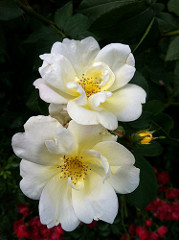

In [76]:
roses = list(data_dir.glob('roses/*'))
print(str(roses[0]))
PIL.Image.open(str(roses[0]))

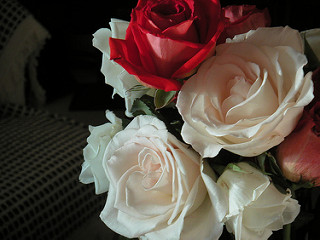

In [77]:
PIL.Image.open(str(roses[1]))

In [78]:
roses = list(data_dir.glob('roses/*'))

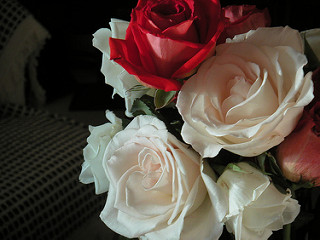

In [79]:
PIL.Image.open(str(roses[1]))


In [80]:
import pathlib
data_dir = "C:/csci490/images/glyph/labeled"
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/csci490/images/glyph/labeled')

Path: C:\csci490\images\glyph\labeled\0\002_ygj9mj_t200_r9_01.png
Label:  0
Glyph Num:  01


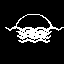

In [81]:
# Get list of glyph images from folder containing 0
sun = list(data_dir.glob('0\\*'))
# Split file path to extract label data
current_path = str(sun[0])
print("Path: "+ current_path)
label = current_path.split("\\")[-2]
print("Label: ", label)
glyph_num = current_path.split("\\")[-1].split(".")[0].split("_")[4]
print("Glyph Num: ", glyph_num)
PIL.Image.open(str(sun[0]))

Path: C:\csci490\images\glyph\labeled\1\000_ygxpws_t220_r7_01.png
Label:  1
Glyph Num:  01
C:\csci490\images\glyph\labeled\1\000_ygxpws_t220_r7_01.png


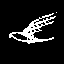

In [82]:
bird = list(data_dir.glob('1\\*'))
current_path = str(bird[0])
print("Path: "+ current_path)
label = current_path.split("\\")[-2]
print("Label: ", label)
glyph_num = current_path.split("\\")[-1].split(".")[0].split("_")[4]
print("Glyph Num: ", glyph_num)
print(str(bird[0]))
PIL.Image.open(str(bird[0]))

In [83]:
batch_size = 40*16
img_height = 64
img_width = 64

In [84]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2086 files belonging to 16 classes.
Using 1669 files for training.


In [85]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2086 files belonging to 16 classes.
Using 417 files for validation.


In [86]:
class_names = train_ds.class_names
print(class_names)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f']


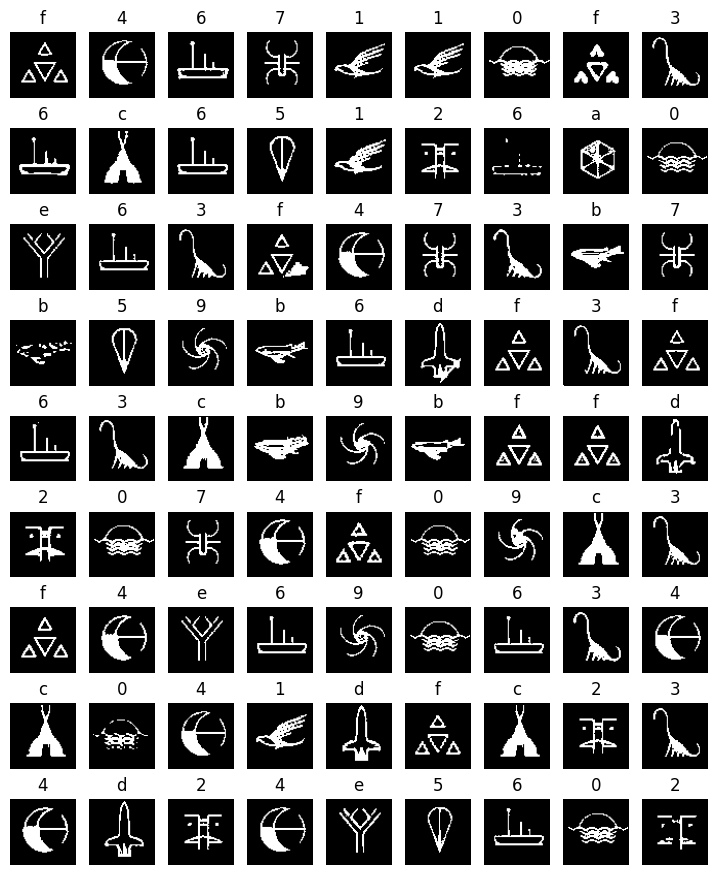

In [87]:
import matplotlib.pyplot as plt

side_len = 9

plt.figure(figsize=(side_len, side_len+2))
for images, labels in train_ds.take(1):
    for i in range(side_len*side_len):
        ax = plt.subplot(side_len, side_len, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [88]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(640, 64, 64, 3)
(640,)


In [89]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [90]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


### Configure the dataset for performance

In [91]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Train a model

In [92]:
num_classes = len(class_names)

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes)
])

In [94]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [96]:
# model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [97]:
epochs =10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
3/3 [==============================] - 4s 901ms/step - loss: 2.6285 - accuracy: 0.2516 - val_loss: 2.2406 - val_accuracy: 0.5420
Epoch 2/10
3/3 [==============================] - 2s 783ms/step - loss: 2.0394 - accuracy: 0.5231 - val_loss: 1.4746 - val_accuracy: 0.7074
Epoch 3/10
3/3 [==============================] - 2s 783ms/step - loss: 1.1987 - accuracy: 0.7358 - val_loss: 0.6119 - val_accuracy: 0.9017
Epoch 4/10
3/3 [==============================] - 3s 956ms/step - loss: 0.4288 - accuracy: 0.9413 - val_loss: 0.1747 - val_accuracy: 0.9760
Epoch 5/10
3/3 [==============================] - 3s 905ms/step - loss: 0.0953 - accuracy: 0.9922 - val_loss: 0.0593 - val_accuracy: 0.9952
Epoch 6/10
3/3 [==============================] - 3s 834ms/step - loss: 0.0232 - accuracy: 0.9982 - val_loss: 0.0334 - val_accuracy: 0.9928
Epoch 7/10
3/3 [==============================] - 3s 835ms/step - loss: 0.0136 - accuracy: 0.9976 - val_loss: 0.0243 - val_accuracy: 0.9928
Epoch 8/10
3/3 [====

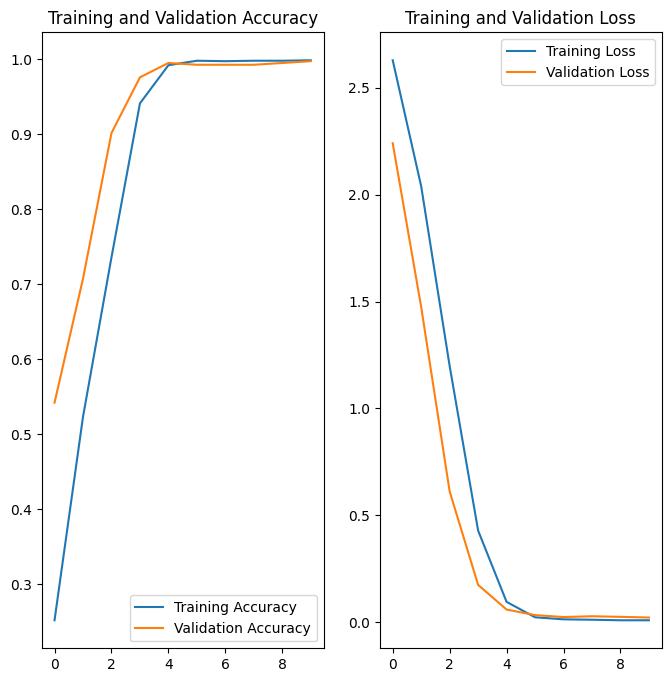

In [99]:
epochs=10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Classifying New Glyphs

In [104]:
# import pathlib
import os
# os.replace("path/to/current/file.foo", "path/to/new/destination/for/file.foo")

In [110]:
unlabeled_dir = "C:/csci490/images/glyph/unlabeled/new"
unlabeled_path = pathlib.Path(unlabeled_dir)
subdirs = ["0","1","2","3","4","5","6","7","8","9","0","a","b","c","d","e","f","uncertain"]
target_dirs = ["C:/csci490/images/glyph/unlabeled/{}".format(subdir) for subdir in subdirs]
# for target_dir in target_dirs: print(target_dir)
target_dirs[-1]

'C:/csci490/images/glyph/unlabeled/uncertain'

In [112]:
new_images = os.listdir(unlabeled_dir)
for i in range(10):
    # print("{}/{}".format(unlabeled_dir,new_images[i]))
    print("{}/{}".format(unlabeled_dir,new_images[i]))

C:/csci490/images/glyph/unlabeled/new/262_xzm9uu_t162_r7_00.png
C:/csci490/images/glyph/unlabeled/new/262_xzm9uu_t162_r7_01.png
C:/csci490/images/glyph/unlabeled/new/262_xzm9uu_t162_r7_02.png
C:/csci490/images/glyph/unlabeled/new/262_xzm9uu_t162_r7_03.png
C:/csci490/images/glyph/unlabeled/new/262_xzm9uu_t162_r7_04.png
C:/csci490/images/glyph/unlabeled/new/262_xzm9uu_t162_r7_05.png
C:/csci490/images/glyph/unlabeled/new/262_xzm9uu_t162_r7_06.png
C:/csci490/images/glyph/unlabeled/new/262_xzm9uu_t162_r7_07.png
C:/csci490/images/glyph/unlabeled/new/262_xzm9uu_t162_r7_08.png
C:/csci490/images/glyph/unlabeled/new/262_xzm9uu_t162_r7_09.png


In [141]:
new_images = os.listdir(unlabeled_dir)
glyph_name_map = {
    "0":"sun","1":"bird","2":"face","3":"dino","4":"moon","5":"bloon","6":"boat","7":"bug","8":"drgfly","9":"galaxy","a":"cube","b":"whale","c":"tent","d":"rocket","e":"tree","f":"atlas","uncertain":"-----"}

addr_len = 12
num_addrs = 5
first_addr = 0
start = first_addr*addr_len
end = (first_addr+num_addrs)*addr_len
min_certainty = 40.

sorted_path = ""

loop_counter = 0

# for i in range(start,end):
for glyph in new_images:
    # img_path = "{}/{}".format(unlabeled_dir,new_images[i])
    img_path = "{}/{}".format(unlabeled_dir,glyph)
    img = tf.keras.utils.load_img(
        img_path, target_size=(img_height, img_width)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array, verbose=0,)
    score = tf.nn.softmax(predictions[0])

    prediction = class_names[np.argmax(score)]

    certainty = 100 * np.max(score)

    # Reclassify low certainty predictions as uncertain
    if certainty < min_certainty: prediction = "uncertain"

        # if i % 12 == 0: print("\n")
    # print(
    #     "{}:{:.0f}%, "
    #     .format(glyph_name_map[prediction], certainty).ljust(12)
    #     , end=""
    # )
    
    # print("From: ", img_path)
    # sorted_path = "C:/csci490/images/glyph/unlabeled/{}/{}".format(prediction,new_images[i])
    sorted_path = "C:/csci490/images/glyph/unlabeled/{}/{}".format(prediction,glyph)
    # print("To: ", sorted_path)

    os.replace(img_path, sorted_path)
    
    # loop_counter += 1
    # if loop_counter == end: break

# print(sorted_path)

### Manual Curation & Training Set Update

After classifying and sorting all input glyphs with the model, I manually go through each tentative classification folder and move any misclassified glyphs into their proper folders. 

Next I move the results into the training set folders to improve the next iteration of the model. 

Now I'm ready to retrain the model and start classifying my own images and those from the starting 'euclid' galaxy.

In [ ]:
# Printing formats for testing loop
    # print(
    #     "[{:d}] pred: {},  confidence: {:.1f}"
    #     .format(i, prediction, 100 * np.max(score), end=", ")
    # )
    # if i % 12 == 0: print("\n")
    # print(
    #     "{}:{:.0f}%, "
    #     .format(glyph_name_map[prediction], certainty).ljust(12)
    #     , end=""
    # )
    # print(
    #     "[{:02d}] {}({}) @ {:.2f}"
    #     .format(i, prediction, glyph_name_map[prediction], 100 * np.max(score))
    #     , end=", "
    # )

### Extract Position Data from Classified Glyphs